In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.model_selection import cross_val_score

from sklearn.utils import resample
plt.style.use('ggplot')



/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = '/Users/varalam/Downloads/Original Dataset with Outliers Included Normalized.csv'
df = pd.read_csv(file_path)
df.head(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded,gender_encoded
0,1.692577,0,1,-0.321051,1.001692,0.047709,0,-0.640425,-0.841175
1,0.537899,0,0,-0.000114,1.001692,-1.426157,0,-0.640425,-0.841175
2,-0.616779,0,0,-0.000114,0.161089,0.489869,0,-0.640425,1.188813
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,0,1.561464,-0.841175
4,1.514935,1,1,-1.081957,-0.679515,0.416175,0,1.561464,1.188813


<h1>SMOTE Oversampling</h1>


In [3]:
is_diabetic = df["diabetes"].value_counts()
print("Yes: ",is_diabetic[1])
print("No: ",is_diabetic[0])



Yes:  8500
No:  91482


In [4]:
#Copy of df before doing SMOTE oversampling
new_df = df.copy()

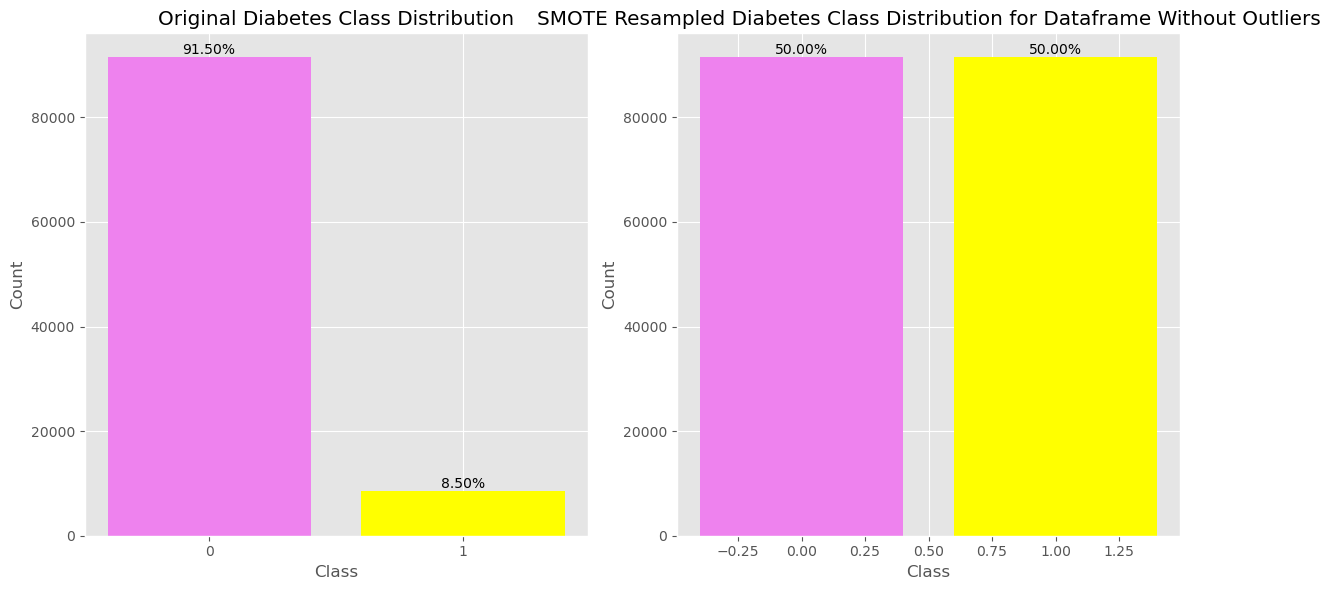

In [5]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = new_df.drop("diabetes", axis=1)
y = new_df["diabetes"]

# Initialize SMOTE

smote = SMOTE(random_state=424)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the occurrences of each class in the original dataset
original_class_counts = new_df["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(new_df) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_resampled).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_resampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe Without Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [6]:
# Create a DataFrame from the SMOTE resampled data
df_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
df_resampled["diabetes"] = y_resampled

df_resampled_bisect = df_resampled.copy()
df_resampled_imp = df_resampled.copy()

<h1>KMeans Clustering<h1>

In [7]:
X = df_resampled.iloc[:, 0:8]
y = df_resampled.iloc[:, -1]

In [8]:
# Fit KMeans model
model=KMeans(n_clusters=4, n_init=10, random_state=424)
model.fit(X)

labels=model.labels_ + 1
labels  #clustering into 2 groups: 0 and 1

centers=model.cluster_centers_
centers

model.inertia_

X['clusters']=labels
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,clusters
0,1.692577,0,1,-0.321051,1.001692,0.047709,-0.640425,-0.841175,1
1,0.537899,0,0,-0.000114,1.001692,-1.426157,-0.640425,-0.841175,1
2,-0.616779,0,0,-0.000114,0.161089,0.489869,-0.640425,1.188813,3
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,1.561464,-0.841175,2
4,1.514935,1,1,-1.081957,-0.679515,0.416175,1.561464,1.188813,2
...,...,...,...,...,...,...,...,...,...
182959,1.348876,0,0,0.073653,0.932655,0.506959,-0.640425,1.188813,1
182960,1.242402,1,0,1.496150,0.593863,2.995441,-0.640425,-0.841175,4
182961,1.156268,0,0,0.391953,0.615763,0.514433,-0.640425,-0.841175,1
182962,0.550334,0,0,0.117714,0.228337,0.136141,1.561464,1.188813,2


<h1>Elbow Plot of KMeans Clustering<h1>

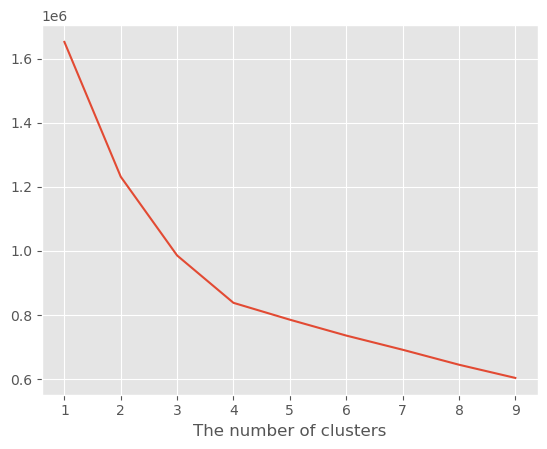

In [9]:
inertia_train={}
for n_cluster in range(1,10):
    model=KMeans(n_clusters=n_cluster, n_init=10)
    model.fit(X)
    inertia_train[n_cluster]=model.inertia_
    
plt.plot(range(1,10),inertia_train.values())
plt.xlabel('The number of clusters') #inertia is the measure of each dots to its centers: tight clusters, low inertia
plt.show()

In [10]:
# Assign the 'clusters' column to the original DataFrame
df_resampled['clusters'] = X['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes,clusters
0,1.692577,0,1,-0.321051,1.001692,0.047709,-0.640425,-0.841175,0,1
1,0.537899,0,0,-0.000114,1.001692,-1.426157,-0.640425,-0.841175,0,1
2,-0.616779,0,0,-0.000114,0.161089,0.489869,-0.640425,1.188813,0,3
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,1.561464,-0.841175,0,2
4,1.514935,1,1,-1.081957,-0.679515,0.416175,1.561464,1.188813,0,2
...,...,...,...,...,...,...,...,...,...,...
182959,1.348876,0,0,0.073653,0.932655,0.506959,-0.640425,1.188813,1,1
182960,1.242402,1,0,1.496150,0.593863,2.995441,-0.640425,-0.841175,1,4
182961,1.156268,0,0,0.391953,0.615763,0.514433,-0.640425,-0.841175,1,1
182962,0.550334,0,0,0.117714,0.228337,0.136141,1.561464,1.188813,1,2


<h1> Logistic Prediction on different Cluster groups <h1>

In [11]:
# Iterate over unique cluster values
for cluster_value in df_resampled['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx = df_resampled[df_resampled['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}'] = cluster_idx

In [12]:
cluster_4

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes,clusters
38,0.360256,1,0,-0.000114,0.161089,2.995441,1.561464,1.188813,1,4
87,-0.261494,0,0,0.745725,0.628091,2.012863,1.561464,-0.841175,1,4
94,0.804363,0,0,-0.000114,1.842295,3.978018,-0.640425,-0.841175,1,4
104,1.692577,1,0,-0.000114,1.188493,3.486729,-0.640425,-0.841175,1,4
125,1.559345,0,0,0.659841,0.908292,3.486729,-0.640425,-0.841175,1,4
...,...,...,...,...,...,...,...,...,...,...
182951,0.613412,0,0,1.515383,3.168663,2.012863,1.561464,-0.841175,1,4
182955,0.506408,0,0,2.598392,0.677823,1.862287,-0.640425,1.188813,1,4
182958,1.692577,1,0,0.000194,3.243301,2.494119,-0.640425,1.188813,1,4
182960,1.242402,1,0,1.496150,0.593863,2.995441,-0.640425,-0.841175,1,4


In [13]:
X_cluster_2 = cluster_2.drop('diabetes', axis=1)  # Features
X_cluster_2 = X_cluster_2.drop('clusters', axis = 1)
y_cluster_2 = cluster_2['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_2, X_test_cluster_2, y_train_cluster_2, y_test_cluster_2 = train_test_split(X_cluster_2, y_cluster_2, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_2 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2.fit(X_train_cluster_2, y_train_cluster_2)

# Make predictions on the test data
predictions_2 = logreg_2.predict(X_test_cluster_2)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_2, predictions_2)
classification_rep = classification_report(y_test_cluster_2, predictions_2)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8332515939185875
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7021
           1       0.83      0.84      0.84      7252

    accuracy                           0.83     14273
   macro avg       0.83      0.83      0.83     14273
weighted avg       0.83      0.83      0.83     14273



In [14]:
X_cluster_3 = cluster_3.drop('diabetes', axis=1)  # Features
X_cluster_3 = X_cluster_3.drop('clusters', axis = 1)
y_cluster_3 = cluster_3['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_3, X_test_cluster_3, y_train_cluster_3, y_test_cluster_3 = train_test_split(X_cluster_3, y_cluster_3, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_3 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3.fit(X_train_cluster_3, y_train_cluster_3)

# Make predictions on the test data
predictions_3 = logreg_3.predict(X_test_cluster_3)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_3, predictions_3)
classification_rep = classification_report(y_test_cluster_3, predictions_3)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9744525547445255
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13604
           1       0.93      0.04      0.07       370

    accuracy                           0.97     13974
   macro avg       0.95      0.52      0.53     13974
weighted avg       0.97      0.97      0.96     13974



In [15]:
X_cluster_1 = cluster_1.drop('diabetes', axis=1)  # Features
X_cluster_1 = X_cluster_1.drop('clusters', axis = 1)
y_cluster_1 = cluster_1['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_1, X_test_cluster_1, y_train_cluster_1, y_test_cluster_1 = train_test_split(X_cluster_1, y_cluster_1, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_1 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_1.fit(X_train_cluster_1, y_train_cluster_1)

# Make predictions on the test data
predictions_1 = logreg_1.predict(X_test_cluster_1)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_1, predictions_1)
classification_rep = classification_report(y_test_cluster_1, predictions_1)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7716816414962085
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      6789
           1       0.80      0.79      0.80      8904

    accuracy                           0.77     15693
   macro avg       0.77      0.77      0.77     15693
weighted avg       0.77      0.77      0.77     15693



In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Combine features and labels from all clusters
X_combined = np.concatenate((X_cluster_1, X_cluster_3, X_cluster_2), axis=0)
y_combined = np.concatenate((y_cluster_1, y_cluster_3, y_cluster_2), axis=0)

# Split the combined data into training and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1', logreg_1), ('cluster_3', logreg_3), ('cluster_2', logreg_2)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined training set
voting_clf.fit(X_train_combined, y_train_combined)

# Make predictions using the ensemble model on the combined test set
ensemble_predictions = voting_clf.predict(X_test_combined)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined, ensemble_predictions)
# Calculate precision
precision_ensemble = precision_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate recall
recall_ensemble = recall_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate F1-score
f1_ensemble = f1_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate the AUC score
auc_ensemble = roc_auc_score(y_test_combined, ensemble_predictions)



classification_report_ensemble = classification_report(y_test_combined, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model f1: {f1_ensemble}")
print(f"Ensemble Model AUC ROC: {auc_ensemble}")
print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

Ensemble Model Accuracy: 0.8526593686702019
Ensemble Model Precision: 0.8518609781626313
Ensemble Model Recall: 0.8526593686702019
Ensemble Model f1: 0.8521065823263883
Ensemble Model AUC ROC: 0.8389821377749979
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     27543
           1       0.81      0.79      0.80     16396

    accuracy                           0.85     43939
   macro avg       0.84      0.84      0.84     43939
weighted avg       0.85      0.85      0.85     43939



<h1>Random Forests model on clusters<h1>

In [17]:
# Create and train the first Random Forest model
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model1.fit(X_train_cluster_1, y_train_cluster_1)


# Make predictions using the first Random Forest model
y_pred_rf1 = rf_model1.predict(X_test_cluster_1)


# Calculate accuracy for the first Random Forest model
accuracy_rf1 = accuracy_score(y_test_cluster_1, y_pred_rf1)
print("Random Forest Model 1 Accuracy:", accuracy_rf1)

classification_rep = classification_report(y_test_cluster_1, y_pred_rf1)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model1, X_train_cluster_1, y_train_cluster_1, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())




Random Forest Model 1 Accuracy: 0.9550117886955968
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6789
           1       0.95      0.97      0.96      8904

    accuracy                           0.96     15693
   macro avg       0.96      0.95      0.95     15693
weighted avg       0.96      0.96      0.95     15693

Cross-validated Accuracy Scores: [0.95479995 0.95288816 0.95466339 0.94920115 0.95165916]
Mean Cross-validated Accuracy: 0.9526423596886522


In [18]:
# Create and train the first Random Forest model
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model2.fit(X_train_cluster_2, y_train_cluster_2)


# Make predictions using the first Random Forest model
y_pred_rf2 = rf_model2.predict(X_test_cluster_2)


# Calculate accuracy for the first Random Forest model
accuracy_rf2 = accuracy_score(y_test_cluster_2, y_pred_rf2)
print("Random Forest Model 1 Accuracy:", accuracy_rf2)

classification_rep = classification_report(y_test_cluster_2, y_pred_rf2)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model2, X_train_cluster_2, y_train_cluster_2, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())



Random Forest Model 1 Accuracy: 0.9634975127863799
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7021
           1       0.96      0.97      0.96      7252

    accuracy                           0.96     14273
   macro avg       0.96      0.96      0.96     14273
weighted avg       0.96      0.96      0.96     14273

Cross-validated Accuracy Scores: [0.95766401 0.95571236 0.9570635  0.95525526 0.95525526]
Mean Cross-validated Accuracy: 0.9561900768806639


In [19]:
# Create and train the first Random Forest model
rf_model3 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model3.fit(X_train_cluster_3, y_train_cluster_3)

# Make predictions using the first Random Forest model
y_pred_rf3 = rf_model3.predict(X_test_cluster_3)

# Calculate accuracy for the first Random Forest model
accuracy_rf3 = accuracy_score(y_test_cluster_3, y_pred_rf3)
print("Random Forest Model 3 Accuracy:", accuracy_rf3)

classification_rep = classification_report(y_test_cluster_3, y_pred_rf3)

print("Classification Report:")
print(classification_rep)






Random Forest Model 3 Accuracy: 0.9939172749391727
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13604
           1       0.97      0.79      0.87       370

    accuracy                           0.99     13974
   macro avg       0.98      0.90      0.94     13974
weighted avg       0.99      0.99      0.99     13974



In [20]:
X_cluster_4 = cluster_4.drop('diabetes', axis=1)  # Features
X_cluster_4 = X_cluster_4.drop('clusters', axis = 1)
y_cluster_4 = cluster_4['diabetes']  # Target variable

# Split the data into training and test sets
X_train_cluster_4, X_test_cluster_4, y_train_cluster_4, y_test_cluster_4 = train_test_split(X_cluster_4, y_cluster_4, test_size=0.3, random_state=424)



# Create and train the first Random Forest model
rf_model4 = RandomForestClassifier(n_estimators=100, random_state=424)

rf_model4.fit(X_train_cluster_4, y_train_cluster_4)

# Make predictions using the first Random Forest model
y_pred_rf4 = rf_model4.predict(X_test_cluster_4)

# Calculate accuracy for the first Random Forest model
accuracy_rf4 = accuracy_score(y_test_cluster_4, y_pred_rf4)
print("Random Forest Model 4 Accuracy:", accuracy_rf4)

classification_rep = classification_report(y_test_cluster_4, y_pred_rf4)

print("Classification Report:")
print(classification_rep)




Random Forest Model 4 Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     10951

    accuracy                           1.00     10951
   macro avg       1.00      1.00      1.00     10951
weighted avg       1.00      1.00      1.00     10951



In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_combined_rf = np.concatenate((X_cluster_1, X_cluster_2, X_cluster_3, X_cluster_4), axis=0)
y_combined_rf = np.concatenate((y_cluster_1, y_cluster_2, y_cluster_3, y_cluster_4), axis=0)

# Split the combined_rf data into training and test sets
X_train_combined_rf, X_test_combined_rf, y_train_combined_rf, y_test_combined_rf = train_test_split(X_combined_rf, y_combined_rf, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1', rf_model1), ('cluster_2', rf_model2), ('cluster_3', rf_model3), ('cluster_4', rf_model4)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf, y_train_combined_rf)

# Make predictions using the ensemble model on the combined_rf test set
ensemble_predictions = voting_clf.predict(X_test_combined_rf)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_rf, ensemble_predictions)


# Calculate precision
precision_ensemble = precision_score(y_test_combined_rf, ensemble_predictions, average='weighted')

# Calculate recall
recall_ensemble = recall_score(y_test_combined_rf, ensemble_predictions, average='weighted')

# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_rf, ensemble_predictions, average='weighted')


classification_report_ensemble = classification_report(y_test_combined_rf, ensemble_predictions)


print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model F1-score: {f1_ensemble}")


print("Ensemble Model Classification Report:")
print(classification_report_ensemble)




Ensemble Model Accuracy: 0.97602477682638
Ensemble Model Precision: 0.9760309150313308
Ensemble Model Recall: 0.97602477682638
Ensemble Model F1-score: 0.9760247347152929
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     27467
           1       0.97      0.98      0.98     27423

    accuracy                           0.98     54890
   macro avg       0.98      0.98      0.98     54890
weighted avg       0.98      0.98      0.98     54890



In [22]:
from sklearn.metrics import roc_auc_score

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf, y_train_combined_rf)

# Initialize an empty array to store the predicted probabilities
ensemble_probabilities = np.zeros((len(X_test_combined_rf), 2))  # Assuming binary classification

# Iterate over individual models in the ensemble
for estimator in voting_clf.estimators_:
    # Calculate the predicted probabilities for each class
    class_probabilities = estimator.predict_proba(X_test_combined_rf)
    # Aggregate the predicted probabilities
    ensemble_probabilities += class_probabilities

# Take the average of the predicted probabilities
ensemble_probabilities /= len(voting_clf.estimators_)

# Extract the probabilities for the positive class (assuming binary classification)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Now you can use positive_class_probabilities for further analysis, such as calculating AUC-ROC
# Calculate AUC-ROC
auc = roc_auc_score(y_test_combined_rf, positive_class_probabilities)

print(f"Ensemble Model AUC-ROC: {auc}")



Ensemble Model AUC-ROC: 0.9975050275013776


<h1>EDA on categorical variables<h1>

In [ ]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Create a new column 'bmi/age' by dividing 'bmi' by 'age'
df_resampled['bmi/age'] = df_resampled['bmi'] / df_resampled['age']

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()



In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='age', y='blood_glucose_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='HbA1c_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Age')
plt.show()

<h1> Bisecting KMeans <h1>

In [23]:
df_resampled_bisect 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,1.692577,0,1,-0.321051,1.001692,0.047709,-0.640425,-0.841175,0
1,0.537899,0,0,-0.000114,1.001692,-1.426157,-0.640425,-0.841175,0
2,-0.616779,0,0,-0.000114,0.161089,0.489869,-0.640425,1.188813,0
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,1.561464,-0.841175,0
4,1.514935,1,1,-1.081957,-0.679515,0.416175,1.561464,1.188813,0
...,...,...,...,...,...,...,...,...,...
182959,1.348876,0,0,0.073653,0.932655,0.506959,-0.640425,1.188813,1
182960,1.242402,1,0,1.496150,0.593863,2.995441,-0.640425,-0.841175,1
182961,1.156268,0,0,0.391953,0.615763,0.514433,-0.640425,-0.841175,1
182962,0.550334,0,0,0.117714,0.228337,0.136141,1.561464,1.188813,1


In [24]:
X_bisect = df_resampled_bisect.iloc[:, 0:8]
y_bisect = df_resampled_bisect.iloc[:, -1]


# Instantiate BisectingKMeans with desired number of clusters
bkm = BisectingKMeans(n_clusters=4, random_state=424)

# Fit the model to the data
bkm.fit(X_bisect)



# Predict the clusters for the data points
labels = bkm.predict(X_bisect) + 1

# Print the cluster centers
print("Cluster centers:")
print(bkm.cluster_centers_)

X_bisect['clusters']=labels
X_bisect

Cluster centers:
[[ 0.87339477  0.27843338  0.1402214   1.23307749  1.97930871  0.45036948
   0.60500203  0.19183542]
 [ 0.87425924  0.22319703  0.13903346  0.61903105  1.19372565  2.82734911
   0.30093419  0.11752419]
 [ 0.40221187  0.12136548  0.07480677  0.12362436  0.04485183 -0.1376749
   1.56146424  0.06685256]
 [-0.01800201  0.07967183  0.04100969 -0.05562417  0.05962994 -0.09115543
  -0.64042453 -0.02263625]]


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,clusters
0,1.692577,0,1,-0.321051,1.001692,0.047709,-0.640425,-0.841175,4
1,0.537899,0,0,-0.000114,1.001692,-1.426157,-0.640425,-0.841175,4
2,-0.616779,0,0,-0.000114,0.161089,0.489869,-0.640425,1.188813,4
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,1.561464,-0.841175,3
4,1.514935,1,1,-1.081957,-0.679515,0.416175,1.561464,1.188813,3
...,...,...,...,...,...,...,...,...,...
182959,1.348876,0,0,0.073653,0.932655,0.506959,-0.640425,1.188813,4
182960,1.242402,1,0,1.496150,0.593863,2.995441,-0.640425,-0.841175,2
182961,1.156268,0,0,0.391953,0.615763,0.514433,-0.640425,-0.841175,4
182962,0.550334,0,0,0.117714,0.228337,0.136141,1.561464,1.188813,3


In [25]:
# Assign the 'clusters' column to the original DataFrame
df_resampled_bisect['clusters'] = X_bisect['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled_bisect

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes,clusters
0,1.692577,0,1,-0.321051,1.001692,0.047709,-0.640425,-0.841175,0,4
1,0.537899,0,0,-0.000114,1.001692,-1.426157,-0.640425,-0.841175,0,4
2,-0.616779,0,0,-0.000114,0.161089,0.489869,-0.640425,1.188813,0,4
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,1.561464,-0.841175,0,3
4,1.514935,1,1,-1.081957,-0.679515,0.416175,1.561464,1.188813,0,3
...,...,...,...,...,...,...,...,...,...,...
182959,1.348876,0,0,0.073653,0.932655,0.506959,-0.640425,1.188813,1,4
182960,1.242402,1,0,1.496150,0.593863,2.995441,-0.640425,-0.841175,1,2
182961,1.156268,0,0,0.391953,0.615763,0.514433,-0.640425,-0.841175,1,4
182962,0.550334,0,0,0.117714,0.228337,0.136141,1.561464,1.188813,1,3


<h1> Logistic Prediction on bisect Cluster groups <h1>

In [26]:
# Iterate over unique cluster values
for cluster_value in df_resampled_bisect['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx_bisect = df_resampled_bisect[df_resampled_bisect['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}_bisect'] = cluster_idx_bisect

In [31]:
cluster_2_bisect

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes,clusters
26,1.115238,0,1,-0.000114,0.908292,1.521575,1.561464,1.188813,1,2
38,0.360256,1,0,-0.000114,0.161089,2.995441,1.561464,1.188813,1,2
65,0.759953,0,1,-0.634454,0.908292,1.521575,1.561464,-0.841175,0,2
87,-0.261494,0,0,0.745725,0.628091,2.012863,1.561464,-0.841175,1,2
94,0.804363,0,0,-0.000114,1.842295,3.978018,-0.640425,-0.841175,1,2
...,...,...,...,...,...,...,...,...,...,...
182942,-0.028645,1,0,0.861382,3.041365,3.964749,-0.640425,1.188813,1,2
182947,-0.647437,0,0,1.912364,0.650385,3.978018,1.561464,-0.841175,1,2
182955,0.506408,0,0,2.598392,0.677823,1.862287,-0.640425,1.188813,1,2
182958,1.692577,1,0,0.000194,3.243301,2.494119,-0.640425,1.188813,1,2


In [32]:
X_cluster_1_bisect = cluster_1_bisect.drop('diabetes', axis=1)  # Features
X_cluster_1_bisect = X_cluster_1_bisect.drop('clusters', axis = 1)
y_cluster_1_bisect = cluster_1_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_1_bisect, X_test_cluster_1_bisect, y_train_cluster_1_bisect, y_test_cluster_1_bisect = train_test_split(X_cluster_1_bisect, y_cluster_1_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_1_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_1_bisect.fit(X_train_cluster_1_bisect, y_train_cluster_1_bisect)

# Make predictions on the test data
predictions_1_bisect = logreg_1_bisect.predict(X_test_cluster_1_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_1_bisect, predictions_1_bisect)
classification_rep = classification_report(y_test_cluster_1_bisect, predictions_1_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9356924954240391
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.10      0.17       546
           1       0.94      1.00      0.97      7649

    accuracy                           0.94      8195
   macro avg       0.77      0.55      0.57      8195
weighted avg       0.92      0.94      0.91      8195



In [33]:
X_cluster_2_bisect = cluster_2_bisect.drop('diabetes', axis=1)  # Features
X_cluster_2_bisect = X_cluster_2_bisect.drop('clusters', axis = 1)
y_cluster_2_bisect = cluster_2_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_2_bisect, X_test_cluster_2_bisect, y_train_cluster_2_bisect, y_test_cluster_2_bisect = train_test_split(X_cluster_2_bisect, y_cluster_2_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_2_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2_bisect.fit(X_train_cluster_2_bisect, y_train_cluster_2_bisect)

# Make predictions on the test data
predictions_2_bisect = logreg_2_bisect.predict(X_test_cluster_2_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_2_bisect, predictions_2_bisect)
classification_rep = classification_report(y_test_cluster_2_bisect, predictions_2_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9638673486223396
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       617
           1       0.97      0.99      0.98     11505

    accuracy                           0.96     12122
   macro avg       0.84      0.75      0.78     12122
weighted avg       0.96      0.96      0.96     12122



In [34]:
X_cluster_3_bisect = cluster_3_bisect.drop('diabetes', axis=1)  # Features
X_cluster_3_bisect = X_cluster_3_bisect.drop('clusters', axis = 1)
y_cluster_3_bisect = cluster_3_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_3_bisect, X_test_cluster_3_bisect, y_train_cluster_3_bisect, y_test_cluster_3_bisect = train_test_split(X_cluster_3_bisect, y_cluster_3_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_3_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3_bisect.fit(X_train_cluster_3_bisect, y_train_cluster_3_bisect)

# Make predictions on the test data
predictions_3_bisect = logreg_3_bisect.predict(X_test_cluster_3_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_3_bisect, predictions_3_bisect)
classification_rep = classification_report(y_test_cluster_3_bisect, predictions_3_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8253935800449805
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6967
           1       0.71      0.67      0.69      2815

    accuracy                           0.83      9782
   macro avg       0.79      0.78      0.78      9782
weighted avg       0.82      0.83      0.82      9782



In [35]:
X_cluster_4_bisect = cluster_4_bisect.drop('diabetes', axis=1)  # Features
X_cluster_4_bisect = X_cluster_4_bisect.drop('clusters', axis = 1)
y_cluster_4_bisect = cluster_4_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_4_bisect, X_test_cluster_4_bisect, y_train_cluster_4_bisect, y_test_cluster_4_bisect = train_test_split(X_cluster_4_bisect, y_cluster_4_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_4_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_4_bisect.fit(X_train_cluster_4_bisect, y_train_cluster_4_bisect)

# Make predictions on the test data
predictions_4_bisect = logreg_4_bisect.predict(X_test_cluster_4_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_4_bisect, predictions_4_bisect)
classification_rep = classification_report(y_test_cluster_4_bisect, predictions_4_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8600354953210713
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     19310
           1       0.71      0.62      0.66      5482

    accuracy                           0.86     24792
   macro avg       0.80      0.77      0.79     24792
weighted avg       0.85      0.86      0.86     24792



In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_bisect_combined = np.concatenate((X_cluster_1_bisect, X_cluster_3_bisect, X_cluster_2_bisect, X_cluster_4_bisect), axis=0)
y_bisect_combined = np.concatenate((y_cluster_1_bisect, y_cluster_3_bisect, y_cluster_2_bisect, y_cluster_4_bisect), axis=0)

# Split the bisect_combined data into training and test sets
X_train_bisect_combined, X_test_bisect_combined, y_train_bisect_combined, y_test_bisect_combined = train_test_split(X_bisect_combined, y_bisect_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1_bisect', logreg_1_bisect), ('cluster_2_bisect', logreg_2_bisect), ('cluster_3_bisect', logreg_3_bisect), ('cluster_4_bisect', logreg_4_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_bisect_combined, y_train_bisect_combined)

# Make predictions using the ensemble model on the bisect_combined test set
ensemble_predictions_bisect = voting_clf.predict(X_test_bisect_combined)

# Evaluate the ensemble model
accuracy_ensemble_bisect = accuracy_score(y_test_bisect_combined, ensemble_predictions)

# Calculate precision
precision_ensemble_bisect = precision_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')

# Calculate recall
recall_ensemble_bisect = recall_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')

# Calculate F1-score
f1_ensemble_bisect = f1_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')

classification_report_ensemble_bisect = classification_report(y_test_bisect_combined, ensemble_predictions_bisect)

print(f"Ensemble Bisect Model Accuracy: {accuracy_ensemble_bisect}")
print(f"Ensemble Bisect Model Precision: {precision_ensemble_bisect}")
print(f"Ensemble Bisect Model Recall: {recall_ensemble_bisect}")
print(f"Ensemble Bisect Model F1-score: {f1_ensemble_bisect}")


print("Ensemble Bisect Model Classification Report:")
print(classification_report_ensemble_bisect)

Ensemble Bisect Model Accuracy: 0.5205684095463654
Ensemble Bisect Model Precision: 0.8834241587296592
Ensemble Bisect Model Recall: 0.8834213882310075
Ensemble Bisect Model F1-score: 0.883421124150548
Ensemble Bisect Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     27453
           1       0.88      0.88      0.88     27437

    accuracy                           0.88     54890
   macro avg       0.88      0.88      0.88     54890
weighted avg       0.88      0.88      0.88     54890



In [40]:
from sklearn.metrics import roc_auc_score

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_bisect_combined, y_train_bisect_combined)

# Initialize an empty array to store the predicted probabilities
ensemble_probabilities = np.zeros((len(X_test_bisect_combined), 2))  # Assuming binary classification

# Iterate over individual models in the ensemble
for estimator in voting_clf.estimators_:
    # Calculate the predicted probabilities for each class
    class_probabilities = estimator.predict_proba(X_test_bisect_combined)
    # Aggregate the predicted probabilities
    ensemble_probabilities += class_probabilities

# Take the average of the predicted probabilities
ensemble_probabilities /= len(voting_clf.estimators_)

# Extract the probabilities for the positive class (assuming binary classification)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Now you can use positive_class_probabilities for further analysis, such as calculating AUC-ROC
# Calculate AUC-ROC
auc = roc_auc_score(y_test_bisect_combined, positive_class_probabilities)

print(f"Ensemble Model AUC-ROC: {auc}")





Ensemble Model AUC-ROC: 0.9621730326338748


<h1>Random Forests model on bisect clusters<h1>

In [41]:
# Split the data into training and test sets
X_train_cluster_1_bisect, X_test_cluster_1_bisect, y_train_cluster_1_bisect, y_test_cluster_1_bisect = train_test_split(X_cluster_1_bisect, y_cluster_1_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model1_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model1_bisect.fit(X_train_cluster_1_bisect, y_train_cluster_1_bisect)


# Make predictions using the first Random Forest model
y_pred_rf1_bisect = rf_model1_bisect.predict(X_test_cluster_1_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf1_bisect = accuracy_score(y_test_cluster_1_bisect, y_pred_rf1_bisect)
print("Random Forest Model 1 Bisect Accuracy:", accuracy_rf1_bisect)

classification_rep = classification_report(y_test_cluster_1_bisect, y_pred_rf1_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model1_bisect, X_train_cluster_1_bisect, y_train_cluster_1_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())





Random Forest Model 1 Bisect Accuracy: 0.975960951799878
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       546
           1       0.98      1.00      0.99      7649

    accuracy                           0.98      8195
   macro avg       0.95      0.85      0.89      8195
weighted avg       0.97      0.98      0.97      8195

Cross-validated Biscet Accuracy Scores: [0.97071895 0.97751046 0.97358787 0.97437238 0.97306485]
Mean Cross-validated Bisect Accuracy: 0.9738509038203844


In [42]:
# Split the data into training and test sets
X_train_cluster_2_bisect, X_test_cluster_2_bisect, y_train_cluster_2_bisect, y_test_cluster_2_bisect = train_test_split(X_cluster_2_bisect, y_cluster_2_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model2_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model2_bisect.fit(X_train_cluster_2_bisect, y_train_cluster_2_bisect)


# Make predictions using the first Random Forest model
y_pred_rf2_bisect = rf_model2_bisect.predict(X_test_cluster_2_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf2_bisect = accuracy_score(y_test_cluster_2_bisect, y_pred_rf2_bisect)
print("Random Forest Model 2 Bisect Accuracy:", accuracy_rf2_bisect)

classification_rep = classification_report(y_test_cluster_2_bisect, y_pred_rf2_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model2_bisect, X_train_cluster_2_bisect, y_train_cluster_2_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())




Random Forest Model 2 Bisect Accuracy: 0.9891932024418413
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       617
           1       0.99      1.00      0.99     11505

    accuracy                           0.99     12122
   macro avg       0.96      0.93      0.94     12122
weighted avg       0.99      0.99      0.99     12122

Cross-validated Biscet Accuracy Scores: [0.98515114 0.98656532 0.98815627 0.98391089 0.98673975]
Mean Cross-validated Bisect Accuracy: 0.9861046721101818


In [43]:
# Split the data into training and test sets
X_train_cluster_3_bisect, X_test_cluster_3_bisect, y_train_cluster_3_bisect, y_test_cluster_3_bisect = train_test_split(X_cluster_3_bisect, y_cluster_3_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model3_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model3_bisect.fit(X_train_cluster_3_bisect, y_train_cluster_3_bisect)


# Make predictions using the first Random Forest model
y_pred_rf3_bisect = rf_model3_bisect.predict(X_test_cluster_3_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf3_bisect = accuracy_score(y_test_cluster_3_bisect, y_pred_rf3_bisect)
print("Random Forest Model 3 Bisect Accuracy:", accuracy_rf3_bisect)

classification_rep = classification_report(y_test_cluster_3_bisect, y_pred_rf3_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model3_bisect, X_train_cluster_3_bisect, y_train_cluster_3_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())




Random Forest Model 3 Bisect Accuracy: 0.9676957677366592
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6967
           1       0.94      0.95      0.94      2815

    accuracy                           0.97      9782
   macro avg       0.96      0.96      0.96      9782
weighted avg       0.97      0.97      0.97      9782

Cross-validated Biscet Accuracy Scores: [0.95991238 0.96560789 0.95880806 0.95354952 0.96056091]
Mean Cross-validated Bisect Accuracy: 0.9596877510840109


In [44]:
# Split the data into training and test sets
X_train_cluster_4_bisect, X_test_cluster_4_bisect, y_train_cluster_4_bisect, y_test_cluster_4_bisect = train_test_split(X_cluster_4_bisect, y_cluster_4_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model4_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model4_bisect.fit(X_train_cluster_4_bisect, y_train_cluster_4_bisect)


# Make predictions using the first Random Forest model
y_pred_rf4_bisect = rf_model4_bisect.predict(X_test_cluster_4_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf4_bisect = accuracy_score(y_test_cluster_4_bisect, y_pred_rf4_bisect)
print("Random Forest Model 4 Bisect Accuracy:", accuracy_rf4_bisect)

classification_rep = classification_report(y_test_cluster_4_bisect, y_pred_rf4_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model4_bisect, X_train_cluster_4_bisect, y_train_cluster_4_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())




Random Forest Model 4 Bisect Accuracy: 0.9720070990642142
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19310
           1       0.94      0.93      0.94      5482

    accuracy                           0.97     24792
   macro avg       0.96      0.96      0.96     24792
weighted avg       0.97      0.97      0.97     24792

Cross-validated Biscet Accuracy Scores: [0.96853933 0.9693172  0.97320425 0.97199412 0.97121618]
Mean Cross-validated Bisect Accuracy: 0.9708542163276774


In [50]:
# Combine features and labels from all clusters
X_bisect_combined_rf = np.concatenate((X_cluster_1_bisect, X_cluster_2_bisect, X_cluster_3_bisect, X_cluster_4_bisect), axis=0)
y_bisect_combined_rf = np.concatenate((y_cluster_1_bisect, y_cluster_2_bisect, y_cluster_3_bisect, y_cluster_4_bisect), axis=0)

# Split the combined_rf data into training and test sets
X_train_combined_rf_bisect, X_test_combined_rf_bisect, y_train_combined_rf_bisect, y_test_combined_rf_bisect = train_test_split(X_bisect_combined_rf, y_bisect_combined_rf, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1_bisect', rf_model1_bisect), ('cluster_2_bisect', rf_model2_bisect), ('cluster_3_bisect', rf_model3_bisect), ('cluster_4_bisect', rf_model4_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf_bisect, y_train_combined_rf_bisect)

# Make predictions using the ensemble model on the combined_rf test set
ensemble_predictions = voting_clf.predict(X_test_combined_rf_bisect)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_rf_bisect, ensemble_predictions)

# Calculate precision
precision_ensemble = precision_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

# Calculate recall
recall_ensemble = recall_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

classification_report_ensemble = classification_report(y_test_combined_rf_bisect, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model F1-score: {f1_ensemble}")


print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

Ensemble Model Accuracy: 0.9757150664966296
Ensemble Model Precision: 0.9757188030968611
Ensemble Model Recall: 0.9757150664966296
Ensemble Model F1-score: 0.9757148099003887
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     27289
           1       0.97      0.98      0.98     27601

    accuracy                           0.98     54890
   macro avg       0.98      0.98      0.98     54890
weighted avg       0.98      0.98      0.98     54890



In [51]:
from sklearn.metrics import roc_auc_score

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf_bisect, y_train_combined_rf_bisect)

# Initialize an empty array to store the predicted probabilities
ensemble_probabilities = np.zeros((len(X_test_combined_rf_bisect), 2))  # Assuming binary classification

# Iterate over individual models in the ensemble
for estimator in voting_clf.estimators_:
    # Calculate the predicted probabilities for each class
    class_probabilities = estimator.predict_proba(X_test_combined_rf_bisect)
    # Aggregate the predicted probabilities
    ensemble_probabilities += class_probabilities

# Take the average of the predicted probabilities
ensemble_probabilities /= len(voting_clf.estimators_)

# Extract the probabilities for the positive class (assuming binary classification)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Now you can use positive_class_probabilities for further analysis, such as calculating AUC-ROC
# Calculate AUC-ROC
auc = roc_auc_score(y_test_combined_rf_bisect, positive_class_probabilities)

print(f"Ensemble Model AUC-ROC: {auc}")




Ensemble Model AUC-ROC: 0.9975736005722086


<h1>EDA on categorical variables bisect df<h1>

In [ ]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()



In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

<h1> Features Importance Incorporated <h1>

<h1>K-Means Important Clustering <h1>

In [ ]:
columns_to_drop = ["hypertension", "heart_disease", "smoking_history_encoded", "gender_encoded"]
df_resesampled_imp = df_resampled.copy()
df_resampled_imp = df_resampled_imp.drop(columns=columns_to_drop)
df_important_bisect = df_resampled_imp.copy()



In [ ]:
X_important = df_resampled_imp.iloc[:, 0:4]
y = df_resampled_imp.iloc[:, -1]

In [ ]:
# Fit KMeans model
model=KMeans(n_clusters=4, n_init=10, random_state=424)
model.fit(X_important)

labels=model.labels_ + 1
labels  #clustering into 2 groups: 0 and 1

centers=model.cluster_centers_
centers

model.inertia_

X_important['clusters']=labels
X_important

In [ ]:
inertia_train={}
for n_cluster in range(1,10):
    model=KMeans(n_clusters=n_cluster, n_init=10, random_state =424)
    model.fit(X_important)
    inertia_train[n_cluster]=model.inertia_
    
plt.plot(range(1,10),inertia_train.values())
plt.xlabel('The number of clusters with important') #inertia is the measure of each dots to its centers: tight clusters, low inertia
plt.show()

In [ ]:
# Assign the 'clusters' column to the original DataFrame
df_resampled_imp['clusters'] = X_important['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled_imp

In [ ]:
important_1 = df_resampled_imp[df_resampled_imp["clusters"] == 1]
important_2 = df_resampled_imp[df_resampled_imp["clusters"] == 2]
important_3 = df_resampled_imp[df_resampled_imp["clusters"] == 3]
important_4 = df_resampled_imp[df_resampled_imp["clusters"] == 4]

In [ ]:
X_important_1 = important_1.drop('diabetes', axis=1)  # Features
X_important_1 = X_important_1.drop('clusters', axis = 1)
y_important_1 = important_1['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_1, X_test_important_1, y_train_important_1, y_test_important_1 = train_test_split(X_important_1, y_important_1, test_size=0.1, random_state=424)

# Initialize the logistic regression model
logreg_1 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_1.fit(X_train_important_1, y_train_important_1)

# Make predictions on the test data
predictions_1 = logreg_1.predict(X_test_important_1)

# Evaluate the model
accuracy = accuracy_score(y_test_important_1, predictions_1)
classification_rep = classification_report(y_test_important_1, predictions_1)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
X_important_2 = important_2.drop('diabetes', axis=1)  # Features
X_important_2 = X_important_2.drop('clusters', axis = 1)
y_important_2 = important_2['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_2, X_test_important_2, y_train_important_2, y_test_important_2 = train_test_split(X_important_2, y_important_2, test_size=0.1, random_state=424)

# Initialize the logistic regression model
logreg_2 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2.fit(X_train_important_2, y_train_important_2)

# Make predictions on the test data
predictions_2 = logreg_2.predict(X_test_important_2)

# Evaluate the model
accuracy = accuracy_score(y_test_important_2, predictions_2)
classification_rep = classification_report(y_test_important_2, predictions_2)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
X_important_3 = important_3.drop('diabetes', axis=1)  # Features
X_important_3 = X_important_3.drop('clusters', axis = 1)
y_important_3 = important_3['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_3, X_test_important_3, y_train_important_3, y_test_important_3 = train_test_split(X_important_3, y_important_3, test_size=0.1, random_state=424)

# Initialize the logistic regression model
logreg_3 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3.fit(X_train_important_3, y_train_important_3)

# Make predictions on the test data
predictions_3 = logreg_3.predict(X_test_important_3)

# Evaluate the model
accuracy = accuracy_score(y_test_important_3, predictions_3)
classification_rep = classification_report(y_test_important_3, predictions_3)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
X_important_4 = important_4.drop('diabetes', axis=1)  # Features
X_important_4 = X_important_4.drop('clusters', axis = 1)
y_important_4 = important_4['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_4, X_test_important_4, y_train_important_4, y_test_important_4 = train_test_split(X_important_4, y_important_4, test_size=0.1, random_state=424)

# Initialize the logistic regression model
logreg_4 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_4.fit(X_train_important_4, y_train_important_4)

# Make predictions on the test data
predictions_4 = logreg_4.predict(X_test_important_4)

# Evaluate the model
accuracy = accuracy_score(y_test_important_4, predictions_4)
classification_rep = classification_report(y_test_important_4, predictions_4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Combine features and labels from all importants
X_combined_important = np.concatenate((X_important_1, X_important_3, X_important_2, X_important_4), axis=0)
y_combined_important = np.concatenate((y_important_1, y_important_3, y_important_2, y_important_4), axis=0)

# Split the combined_important data into training and test sets
X_train_combined_important, X_test_combined_important, y_train_combined_important, y_test_combined_important = train_test_split(X_combined_important, y_combined_important, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('important_1', logreg_1), ('important_3', logreg_3), ('important_2', logreg_2), ('important_4', logreg_4)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_important training set
voting_clf.fit(X_train_combined_important, y_train_combined_important)

# Make predictions using the ensemble model on the combined_important test set
ensemble_predictions = voting_clf.predict(X_test_combined_important)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_important, ensemble_predictions)
# Calculate precision
precision_ensemble = precision_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate recall
recall_ensemble = recall_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate the AUC score
auc_ensemble = roc_auc_score(y_test_combined_important, ensemble_predictions)


classification_report_ensemble = classification_report(y_test_combined_important, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model f1: {f1_ensemble}")
print(f"Ensemble Model AUC ROC: {auc_ensemble}")
print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

In [ ]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

<h1>Bisect K-Means Important Clustering <h1>

In [ ]:
X_important_bisect = df_important_bisect.iloc[:, 0:4]
y_bisect = df_important_bisect.iloc[:, -1]


# Instantiate BisectingKMeans with desired number of clusters
bkm = BisectingKMeans(n_clusters=4, random_state=424)

# Fit the model to the data
bkm.fit(X_important_bisect)



# Predict the clusters for the data points
labels = bkm.predict(X_important_bisect) + 1

# Print the cluster centers
print("Cluster centers:")
print(bkm.cluster_centers_)

X_important_bisect['clusters']=labels
X_important_bisect

In [ ]:
# Assign the 'clusters' column to the original DataFrame
df_important_bisect['clusters'] = X_important_bisect['clusters']

# Display the DataFrame with added 'clusters' column
df_important_bisect

<h1> Logistic Prediction on important bisect Cluster groups <h1>

In [ ]:
# Iterate over unique cluster values
for cluster_value in df_important_bisect['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx_important_bisect = df_important_bisect[df_important_bisect['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}_important_bisect'] = cluster_idx_important_bisect

In [ ]:
X_1_important_bisect = cluster_1_important_bisect.drop('diabetes', axis=1)  # Features
X_1_important_bisect = X_1_important_bisect.drop('clusters', axis = 1)
y_1_important_bisect = cluster_1_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_1_important_bisect, X_test_1_important_bisect, y_train_1_important_bisect, y_test_1_important_bisect = train_test_split(X_1_important_bisect, y_1_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_1_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_1_important_bisect.fit(X_train_1_important_bisect, y_train_1_important_bisect)

# Make predictions on the test data
predictions_1_important_bisect = logreg_1_important_bisect.predict(X_test_1_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_1_important_bisect, predictions_1_important_bisect)
classification_rep = classification_report(y_test_1_important_bisect, predictions_1_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
X_3_important_bisect = cluster_3_important_bisect.drop('diabetes', axis=1)  # Features
X_3_important_bisect = X_3_important_bisect.drop('clusters', axis = 1)
y_3_important_bisect = cluster_3_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_3_important_bisect, X_test_3_important_bisect, y_train_3_important_bisect, y_test_3_important_bisect = train_test_split(X_3_important_bisect, y_3_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_3_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3_important_bisect.fit(X_train_3_important_bisect, y_train_3_important_bisect)

# Make predictions on the test data
predictions_3_important_bisect = logreg_3_important_bisect.predict(X_test_3_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_3_important_bisect, predictions_3_important_bisect)
classification_rep = classification_report(y_test_3_important_bisect, predictions_3_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
X_4_important_bisect = cluster_4_important_bisect.drop('diabetes', axis=1)  # Features
X_4_important_bisect = X_4_important_bisect.drop('clusters', axis = 1)
y_4_important_bisect = cluster_4_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_4_important_bisect, X_test_4_important_bisect, y_train_4_important_bisect, y_test_4_important_bisect = train_test_split(X_4_important_bisect, y_4_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_4_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_4_important_bisect.fit(X_train_4_important_bisect, y_train_4_important_bisect)

# Make predictions on the test data
predictions_4_important_bisect = logreg_4_important_bisect.predict(X_test_4_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_4_important_bisect, predictions_4_important_bisect)
classification_rep = classification_report(y_test_4_important_bisect, predictions_4_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
X_2_important_bisect = cluster_2_important_bisect.drop('diabetes', axis=1)  # Features
X_2_important_bisect = X_2_important_bisect.drop('clusters', axis = 1)
y_2_important_bisect = cluster_2_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_2_important_bisect, X_test_2_important_bisect, y_train_2_important_bisect, y_test_2_important_bisect = train_test_split(X_2_important_bisect, y_2_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_2_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2_important_bisect.fit(X_train_2_important_bisect, y_train_2_important_bisect)

# Make predictions on the test data
predictions_2_important_bisect = logreg_2_important_bisect.predict(X_test_2_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_2_important_bisect, predictions_2_important_bisect)
classification_rep = classification_report(y_test_2_important_bisect, predictions_2_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_important_bisect_combined = np.concatenate((X_1_important_bisect, X_3_important_bisect, X_2_important_bisect, X_4_important_bisect), axis=0)
y_important_bisect_combined = np.concatenate((y_1_important_bisect, y_3_important_bisect, y_2_important_bisect, y_4_important_bisect), axis=0)

# Split the bisect_combined data into training and test sets
X_train_important_bisect_combined, X_test_important_bisect_combined, y_train_important_bisect_combined, y_test_important_bisect_combined = train_test_split(X_important_bisect_combined, y_important_bisect_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1_important_bisect', logreg_1_important_bisect), ('cluster_2_important_bisect', logreg_2_important_bisect), ('cluster_3_important_bisect', logreg_3_important_bisect), ('cluster_4_important_bisect', logreg_4_important_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_important_bisect_combined, y_train_important_bisect_combined)

# Make predictions using the ensemble model on the bisect_combined test set
ensemble_predictions_important_bisect = voting_clf.predict(X_test_important_bisect_combined)

# Evaluate the ensemble model
accuracy_ensemble_important_bisect = accuracy_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect)

# Calculate precision
precision_ensemble_important_bisect = precision_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

# Calculate recall
recall_ensemble_important_bisect = recall_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

# Calculate F1-score
f1_ensemble_important_bisect = f1_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

classification_report_ensemble_important_bisect = classification_report(y_test_important_bisect_combined, ensemble_predictions_important_bisect)

print(f"Ensemble Bisect Model Accuracy: {accuracy_ensemble_important_bisect}")
print(f"Ensemble Bisect Model Precision: {precision_ensemble_important_bisect}")
print(f"Ensemble Bisect Model Recall: {recall_ensemble_important_bisect}")
print(f"Ensemble Bisect Model F1-score: {f1_ensemble_important_bisect}")


print("Ensemble Bisect Model Classification Report:")
print(classification_report_ensemble_important_bisect)

In [ ]:
from sklearn.metrics import roc_auc_score
# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='soft')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_important_bisect_combined, y_train_important_bisect_combined)


# Calculate predicted probabilities for each class
ensemble_probabilities = voting_clf.predict_proba(X_test_important_bisect_combined)

# Extract the predicted probabilities for the positive class (class 1)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test_important_bisect_combined, positive_class_probabilities)

print(f"AUC-ROC Score: {auc_roc}")



In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()



In [ ]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()